* Integrante

  Morales López Erik Brandon (20163041)

In [1]:
#install.packages("ISLR2")
library(ISLR2)
set.seed(1)
library(boot)

In [2]:
## loading the data
Penn <- as.data.frame(read.table("Downloads/penn_jae.dat", header=T ))
n <- dim(Penn)[1]
p_1 <- dim(Penn)[2]
Penn<- subset(Penn, tg== 4| tg==0)
attach(Penn)

In [3]:
T4<- (tg==4)
summary(T4)

   Mode   FALSE    TRUE 
logical    3354    1745 

In [4]:
head(Penn)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
1,10824,0,18,18,0,0,0,0,2,0,...,1,0,0,0,0,0,0,0,1,0
4,10824,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12,10607,4,9,9,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
13,10831,0,27,27,0,0,0,0,1,0,...,1,0,0,0,1,1,0,1,0,0
14,10845,0,27,27,1,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0


In [5]:
Penn$log_inuidur1=log(Penn$inuidur1)
names(Penn)

[1] "abdt"         "tg"           "inuidur1"     "inuidur2"     "female"      
 [6] "black"        "hispanic"     "othrace"      "dep"          "q1"          
[11] "q2"           "q3"           "q4"           "q5"           "q6"          
[16] "recall"       "agelt35"      "agegt54"      "durable"      "nondurable"  
[21] "lusd"         "husd"         "muld"         "log_inuidur1"

# The Bootstrap

In [6]:
boot.fn <- function(data, index)
  coef(
      lm(log_inuidur1 ~ T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd), 
        data = data, subset = index)
    )

In [7]:
set.seed(1)
reg_lineal = boot(Penn, boot.fn, 1000)
reg_lineal


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = Penn, statistic = boot.fn, R = 1000)


Bootstrap Statistics :
         original        bias    std. error
t1*   2.178462326  1.158480e-03  0.15440645
t2*  -0.071692484 -3.524273e-04  0.03557456
t3*   0.126368328  8.394803e-04  0.03516956
t4*  -0.293767980  5.101116e-04  0.06033968
t5*  -0.472445058 -5.488755e-03  0.24363226
t6*   0.029866899  7.606843e-04  0.05553680
t7*   0.096186517 -1.161955e-03  0.04527565
t8*   0.073678072 -1.130668e-03  0.15201926
t9*  -0.038506537 -4.256760e-04  0.14967519
t10* -0.054949195 -8.952685e-04  0.15070895
t11* -0.144177912 -1.587659e-03  0.14981234
t12*  0.003361318 -3.816678e-03  0.16107836
t13* -0.162772168  1.778627e-03  0.03822653
t14*  0.229666708  2.239486e-04  0.05818025
t15*  0.126557359  1.210092e-05  0.04855636
t16* -0.175352572 -6.636363e-04  0.04096754
t17* -0.105224727 -7.223598e-04  0.04517278

In [8]:
summary(
    lm(log_inuidur1 ~ T4+ (female+black+othrace+factor(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd), data = Penn)
  )$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.178462326,0.15901507,13.69972271,5.631260e-42
T4TRUE,-0.071692484,0.03546326,-2.02159887,4.327012e-02
female,0.126368328,0.03482493,3.62867401,2.876799e-04
black,-0.293767980,0.05297556,-5.54534899,3.081966e-08
othrace,-0.472445058,0.19839750,-2.38130547,1.728801e-02
factor(dep)1,0.029866899,0.05414025,0.55165799,5.812070e-01
factor(dep)2,0.096186517,0.04686228,2.05253621,4.016868e-02
q2,0.073678072,0.15682593,0.46980799,6.385124e-01
q3,-0.038506537,0.15647802,-0.24608272,8.056281e-01
q4,-0.054949195,0.15656019,-0.35097809,7.256193e-01


In [9]:
# Showing the result in a data. frame from the bootstrap

T4True <- c(-0.071692484,0.03546326)
Female <- c(0.126368328,0.03482493)
Black <- c(-0.293767980,0.05297556)
nombres <- c("Estimates", "Std. Error")

New_boot <- data.frame(nombres, T4True, Female, Black)
New_boot

nombres,T4True,Female,Black
Estimates,-0.07169248,0.12636833,-0.29376798
Std. Error,0.03546326,0.03482493,0.05297556


* As can be seen in the table I have created, it is understood that I have made 1000 bootstrap estimates for the variables indicated in the exercise such a T4 = -0.07, female = 0.13 and black = -0.30. Making a comparison with the OLS model and the bootstrap we come to the conclusion that the coefficients remain the same or rather there is not much variability, however, what if there is variability is in the standard errors of the bootsrap and the OLS.

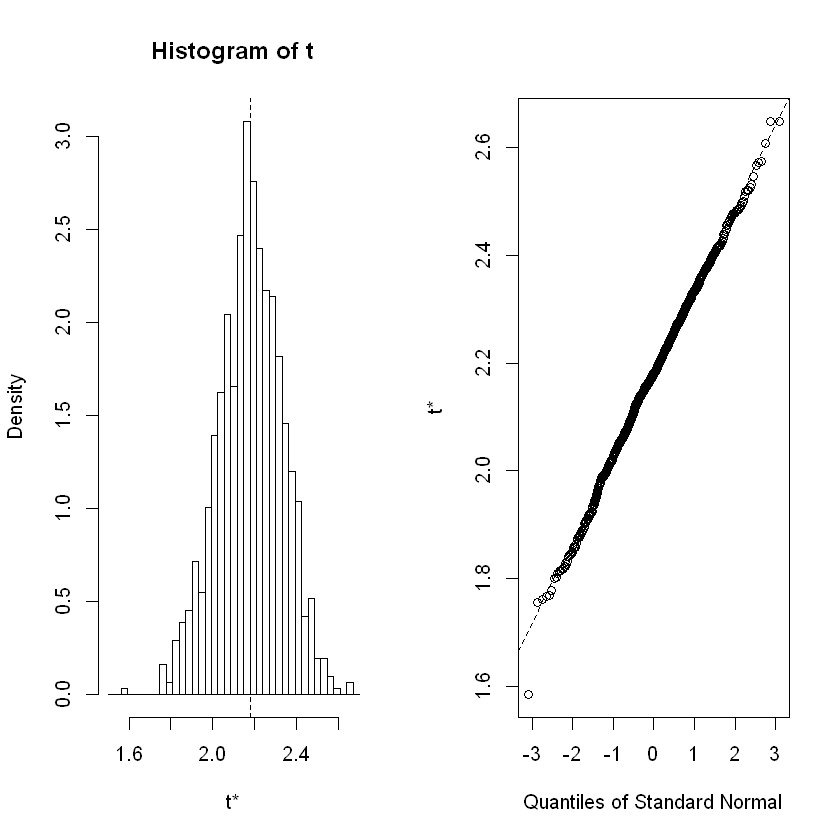

In [10]:
# plotting the 1000 estimation bootstraping
plot(reg_lineal)

# Casual Forest

In [2]:
# The causalTree package is not in CRAN, the most common R repository.
# To install it, uncomment the next lines as appropriate.
install.packages("devtools")  # if you don't have this installed yet.
#devtools::install_github('susanathey/causalTree')
library("devtools")

also installing the dependencies 'cli', 'rcmdcheck', 'sessioninfo'




  There are binary versions available but the source versions are later:
            binary source needs_compilation
cli          2.5.0  3.1.0              TRUE
rcmdcheck    1.3.3  1.4.0             FALSE
sessioninfo  1.1.1  1.2.1             FALSE
devtools     2.4.1  2.4.2             FALSE

  Binaries will be installed
package 'cli' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Erik\AppData\Local\Temp\RtmpiYOS8a\downloaded_packages


installing the source packages 'rcmdcheck', 'sessioninfo', 'devtools'

Warning message in install.packages("devtools"):
"installation of package 'sessioninfo' had non-zero exit status"Warning message in install.packages("devtools"):
"installation of package 'rcmdcheck' had non-zero exit status"Warning message in install.packages("devtools"):
"installation of package 'devtools' had non-zero exit status"

ERROR: Error in library("devtools"): there is no package called 'devtools'


In [20]:
head(Penn, n = 4)

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,log_inuidur1,fact_dep
1,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,2.890372,2
4,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0.000000,0
5,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3.295837,0
12,10607,4,9,9,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,2.197225,0


In [21]:
n <- nrow(Penn)
n

[1] 5099

In [22]:
colnames(Penn)

[1] "abdt"         "tg"           "inuidur1"     "inuidur2"     "female"      
 [6] "black"        "hispanic"     "othrace"      "dep"          "q1"          
[11] "q2"           "q3"           "q4"           "q5"           "q6"          
[16] "recall"       "agelt35"      "agegt54"      "durable"      "nondurable"  
[21] "lusd"         "husd"         "muld"         "log_inuidur1" "fact_dep"

In [20]:


outcome <- "log_inuidur1"

t4 <- "T4"

Penn$fact_dep <- factor(dep)

female <- "female"    # female 1 for 'yes', 0 for 'no'

# Additional covariates
covariates <- c("T4","female","black","othrace","fact_dep","q2","q3","q4","q5","q6","agelt35","agegt54","durable","lusd","husd")

In [22]:
# Recall from last chapter -- this is equivalent to running a t-test
fmla <- formula(paste(outcome, ' ~ ',t4 , '*', female))
ols <- lm(fmla, data=Penn)
coeftest(ols, vcov=vcovHC(ols, type='HC2'))


t test of coefficients:

               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    2.022391   0.026987 74.9392  < 2e-16 ***
T4TRUE        -0.115695   0.046284 -2.4997  0.01246 *  
female         0.084995   0.042787  1.9864  0.04704 *  
T4TRUE:female  0.076010   0.073048  1.0405  0.29814    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [11]:
#showing in a data.frame

estimate <- c(-0.115695,0.084995,0.076010)
Std.Error <- c(0.046284,0.042787,0.073048)
nombres <- c("T4TRUE","FEMALE","T4TRUE:female")

nuevo <- data.frame(estimate,Std.Error,nombres)
nuevo

estimate,Std.Error,nombres
-0.115695,0.046284,T4TRUE
0.084995,0.042787,FEMALE
0.076010,0.073048,T4TRUE:female


In [23]:
fmla

log_inuidur1 ~ T4 * female

# Data-driven hypotheses

In [17]:
# Only valid for randomized data!
fmla <- paste(outcome, " ~", paste(covariates, collapse = " + "))
fmla

[1] "log_inuidur1  ~ T4 + female + black + othrace + fact_dep + q2 + q3 + q4 + q5 + q6 + agelt35 + agegt54 + durable + lusd + husd"

In [18]:
# Dividing data into three subsets
indices <- split(seq(nrow(Penn)), sort(seq(nrow(Penn)) %% 3))
names(indices) <- c('split', 'est', 'test')

In [24]:
# Fitting the forest
ct.unpruned <- honest.causalTree(
  formula=fmla,            # Define the model
  data=Penn[indices$split,],
  est_data=Penn[indices$est,],
  minsize=1,                 # Min. number of treatment and control cases in each leaf
  HonestSampleSize=length(indices$est), #  Num obs used in estimation after splitting
  
  # We recommend not changing the parameters below
  split.Rule="CT",            # Define the splitting option
  cv.option="TOT",            # Cross validation options
  cp=0,                       # Complexity parameter
  split.Honest=TRUE,          # Use honesty when splitting
  cv.Honest=TRUE              # Use honesty when performing cross-validation
)

ERROR: Error in honest.causalTree(formula = fmla, data = Penn[indices$split, : no se pudo encontrar la función "honest.causalTree"


# Questions about the lecture

* 1. Explain why we need to partitionate the data in three sets.

  According to the reading, The division of the database into three sets is mainly due to the fact that the model must be adjusted in order to maximize the heterogeneity of the treatment in each leaf of the tree. After the above. the estimation subset is used to produce a valid estimate on each leaf of the fitted tree. With the latter, we can use a sample division of the data to secure the tree estimates.

*  2. Why do we need to use the honest.causalTree function?
   
   Firstly, the **honest.casualTree function** is included in the package from *casualTree*, which has the objective of implementing recursive Partitioning methods for  cases where there are heterogeneous causal effects.Now, the importance of using the **honest.casualTree function** is because the researcher wants to estimate the casual effects in the leaves of model, which is a Tree model, also it can replace the estimators of each leaf from the tree.To do this, the first thing the researcher has to do is build the decision tree, from the casualtree package and that has to indicate the data that will be trained in the tree, after this, the tree has to be passed together with your details at honest.casualtree. What it does is make a replacement of the estimates that the tree model generates with new estimates for each leaf of the tree. Finally, if you want a greater control of the above, you would have to replace the estimates of each leaf of the tree with treatment effects using a new data set. This can be done thanks to another function called estimate.casualtree

* 3. Explain in detail the creation of the tree and how do you choose the optimal pruned tree

  Taking into consideration Susan Athey's text, the way in which a tree should be created is as follows. First, what you need to do is build a two-stage binary regression tree model. With this, what is sought is for the researcher to specify a binary variable eg (0 and 1), in addition to the result variable. Second, the tree is grown by a division rule. This will cause two groups on each leaf of the tree to minimize the risk function. This is taking into account the nodes on the left and right of the regression tree, until a certain limit is reached.
  
  Now with respect to the other question about the optimal pruned tree, what has to be done in that case is to use cross validation, which consists of one of the automatic learning training methods. This will focus on the leaves to be pruned and selected according to the risk function while the tree is being built.